In [1]:
from IPython.display import Audio, Image, YouTubeVideo

# LESSON 2: Web Application Servers

## CHAPTER 1: Introduction

Now that you have a shiny new server that is safe and secure, it’s time to turn it into a web application server! By the end of this lesson you will accomplish the following:

* Use the [Apache HTTP Server](http://httpd.apache.org/) to respond to HTTP requests and serve a static webpage
* Configure Apache to hand-off specific requests to Python providing the ability to develop dynamic websites
* Setup [PostgreSQL](http://www.postgresql.org/) and write a simple Python application that generates a data-driven website

At the end of this lesson, the response cycle will resemble this:

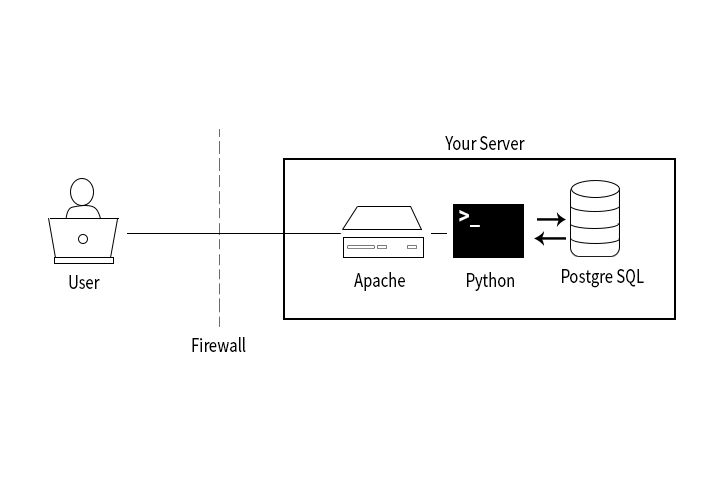


## CHAPTER 2: Vagrant Prerequisites

If you’re using the Vagrant virtual machine from earlier in this course you will need to make a slight modification to the configuration of this machine to make your web server accessible. This step is not related to configuring a web server in general, it’s just a condition of our current environment. You would not need to complete this step if you were configuring a machine from a cloud provider like Amazon Web Services.

Open the ``Vagrantfile`` in your project directory and look for the following section near lines 20-23:
```python
# Create a forwarded port mapping which allows access to a specific port
# within the machine from a port on the host machine. In the example below,
# accessing "localhost:8080" will access port 80 on the guest machine.
# config.vm.network "forwarded_port", guest: 80, host: 8080
```
Uncomment the last line:
```python
config.vm.network "forwarded_port", guest: 80, host: 8080
```
Save the file and start your Vagrant virtual machine using the ``vagrant up`` command. If your virtual machine is currently running, you can reload it using the ``vagrant reload`` command.

This configuration change will setup port forwarding from port 8080 on the host machine (your computer) to the guest machine (your Vagrant virtual machine) when your virtual machine is running. This will allow you to access your web server using the URL http://localhost:8080.

### Compatibility note

On some Windows systems, you will need to add one more argument to the line to ensure that the VM network connects to the correct interface on your host computer:
```
config.vm.network "forwarded_port", guest: 80, host: 8080, host_ip: "127.0.0.1"
```

## CHAPTER 3: Installing Apache

You’ll setup your web application server one piece at a time, testing each as you progress. The first step is to get your server responding to HTTP requests. To do this, you’ll use Apache HTTP Server - the most commonly installed web server on the Internet with roughly 47% market share.

Install Apache using your package manager with the following command: ``sudo apt-get install apache2`` Confirm Apache is working by visiting http://localhost:8080 in your browser. You should see the following page:

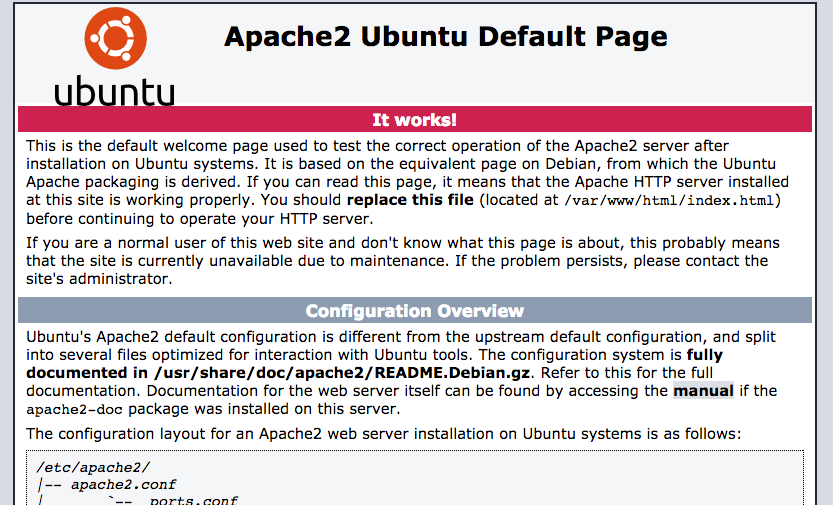

Apache, by default, serves its files from the ``/var/www/html`` directory. If you explore this directory you will find a file called ``index.html`` and if you review that file you will see it contains the HTML of the page you see when you visit http://localhost:8080.

### Exercise

Update the ``index.html`` to simply display “Hello, World!” and refresh your browser to see your new page.

## CHAPTER 4: Installing mod_wsgi

When Apache receives a request it has a number of ways it can respond. What you’ve seen thus far is the simplest method of operation, Apache just returns a file requested or the ``index.html`` file if no file is defined within the URL.

But, Apache can do so much more! You’ll now configure Apache to hand-off certain requests to an application handler - mod_wsgi. The first step in this process is to install mod_wsgi: ``sudo apt-get install libapache2-mod-wsgi``.

You then need to configure Apache to handle requests using the WSGI module. You’ll do this by editing the ``/etc/apache2/sites-enabled/000-default.conf`` file. This file tells Apache how to respond to requests, where to find the files for a particular site and much more. You can read up on everything this file can do within the Apache documentation.

For now, add the following line at the end of the ``<VirtualHost *:80>`` block, right before the closing ``</VirtualHost>`` line: ``WSGIScriptAlias / /var/www/html/myapp.wsgi``

Finally, restart Apache with the ``sudo apache2ctl restart`` command.
>
>*You might get a warning saying "Could not reliably determine the server's fully qualified domain name". If you do, don't worry about it. Check out [this AskUbuntu thread](https://askubuntu.com/questions/256013/apache-error-could-not-reliably-determine-the-servers-fully-qualified-domain-n) for a discussion of the cause of this message.*
>

## CHAPTER 5: Your First WSGI Application

[WSGI](http://wsgi.readthedocs.org/en/latest/) is a specification that describes how a web server communicates with web applications. Most if not all Python web frameworks are WSGI compliant, including [Flask](http://flask.pocoo.org/docs/1.0/deploying/mod_wsgi/) and [Django](https://docs.djangoproject.com/en/2.0/howto/deployment/wsgi/); but to quickly test if you have your Apache configuration correct you’ll write a very basic WSGI application.

You just defined the name of the file you need to write within your Apache configuration by using the ``WSGIScriptAlias`` directive. Despite having the extension .wsgi, these are just Python applications. Create the ``/var/www/html/myapp.wsgi`` file using the command ``sudo nano /var/www/html/myapp.wsgi``. Within this file, write the following application:
```python
def application(environ, start_response):
    status = '200 OK'
    output = 'Hello Udacity!'

    response_headers = [('Content-type', 'text/plain'), ('Content-Length', str(len(output)))]
    start_response(status, response_headers)

    return [output]
```
This application will simply print return ``Hello Udacity!`` along with the required HTTP response headers. After saving this file you can reload ``http://localhost:8080`` to see your application run in all its glory!

## CHAPTER 6: Installing PostgreSQL

Most web applications require persistent data storage, typically using a database server. You will now install PostgreSQL to server your data using the command ``sudo apt-get install postgresql``.

Since you are installing your web server and database server on the same machine, you do not need to modify your firewall settings. Your web server will communicate with the database via an internal mechanism that does not cross the boundaries of the firewall. If you were installing your database on a separate machine, you would need to modify the firewall settings on both the web server and the database server to permit these requests.

### Exercise

Update your ``/var/www/html/myapp.wsgi`` application so that it successfully connects to your database, queries a table for data and presents that piece of data rather than the text ``Hello World!``. You will need to create a table and populate it with data of your choosing, then query it from your app.

This task is easier said than done, so use your research skills and don't be afraid to break things. Good luck!
